In [13]:
# %pip install seaborn
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install scipy



In [1]:
#plot error matrix
# %pip install seaborn
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
def test_model(model, address):

    model= load_model(model)
    input_shape = (128, 128, 3)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        address,
        target_size=input_shape[:2],
        batch_size=1,
        class_mode='categorical',
        shuffle=False
        )
    label_map = (val_generator.class_indices)
    #heatmap
    y_true = val_generator.classes
    y_pred = model.predict(val_generator)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(label_map)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()


Found 27101 images belonging to 11 classes.
27101/27101 [==============================] - 637s 24ms/step
[[ 908   93   81    8   37    7   25    1   10   13   19]
 [ 255 2209  251   92  165  135  177   12   10    7   10]
 [ 158  261 1532   33  285  263   70    5    7    3    7]
 [   3   18    7  191    4   11    3    1    0    1    0]
 [ 205  308  812   70 2376  885  139   12    5   46   60]
 [ 189  739 1291  433 1493 8425  140   45   11   54   55]
 [  29   54   15    5   17   13  491    0    0    1    3]
 [   0   11    1    3    3    9    0  225    0    1    0]
 [   8    2    1    0    1    0    0    0  280    2    3]
 [  11    1    3    0    6    0    0    0    4  283   14]
 [  13    3    3    0   11    1    0    0    7    7  375]]


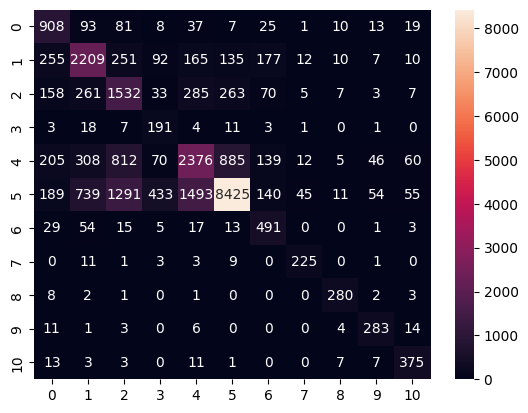

Found 27101 images belonging to 11 classes.
27101/27101 [==============================] - 4571s 169ms/step
[[1063   22   31    6   18    3   23    0    5   15   16]
 [ 341 2251  191   58  174   71  203   15    2   12    5]
 [ 206   93 1846   14  238  168   41    6    0    3    9]
 [   3    3    2  226    1    3    0    0    1    0    0]
 [ 214  137  563   38 3143  627   68   33    6   55   34]
 [ 184  376 1149  173 1965 8857   68   59    3   18   23]
 [  21   15   13    0    8    0  565    2    1    2    1]
 [   0    0    1    1    1    1    0  249    0    0    0]
 [   3    0    0    0    0    0    0    0  289    1    4]
 [   5    1    0    0    1    0    0    0    2  304    9]
 [   7    0    0    0    1    0    0    0    0   10  402]]


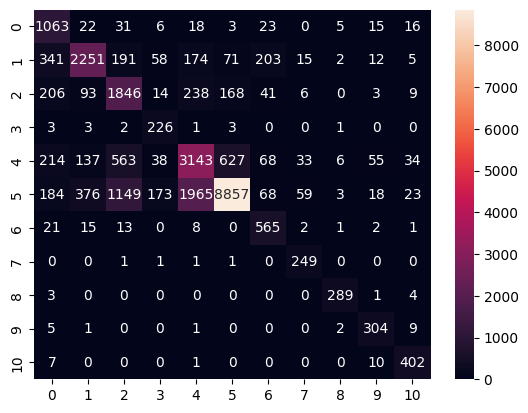

In [15]:
test_model('best_model_CNN.h5', 'Data')
test_model('best_model_EfficientNetV2.h5', 'Data')